# Indicadores de rendimientos para estudiantes

#### Ciclo de vida de un proyecto de Machine Learning

- Entendimiento de problema
- Recopilación de datos
- Comprobación de datos
- EDA Análisis exploratorio de los datos
- Preprocesamiento de los datos
- Entrenamiento de modelos
- Elegir el mejor modelo

### 1) Entendimiento del problema
- Este proyecto intenta comprender cómo el desempeño del estudiante (notas de exámenes) se ve afectado por otras variables como género, origen étnico, nivel de educación de los padres, almuerzo y curso de preparación para exámenes.

### 2) Recopilación de datos
- Fuente del conjunto de datos: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Los datos constan de 8 columnas y 1000 filas.


### 2.1 Importar datos y paquetes requeridas

Importando Pandas, Numpy, Matplotlib, Seaborn y librerias Warings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importar datos CSV 

In [2]:
df=pd.read_csv('data/stud.csv')

#### Mostrar las primeras 5 filas

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Tamaño del dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset información

- gender: sexo de los estudiantes -> (Male/female)
- race/ethnicity: Etnia de los estudiantes -> (Group A,B,C,D)
- parental level od education: nivel de educacaión final de los padres ->>(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch: Si almorzaron antes de los exámenes
- test preparation course: Completo o no completo los cursos antes de los exámenes
- math score: Nota de matemática
- reading score: Nota de lectura
- wtiting score: nota de escritura


### 3. Comprobaciones de datos a realizar

- Verificar valores faltantes
- Verificar duplicados
- Verificar tipo de datos
- Verifique el número de valores únicos de cada columna.
- Verificar estadísticas del conjunto de datos.
- Verifique varias categorías presentes en las diferentes columnas categóricas

### 3.1 Verificar valores faltantes

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### No hay valores faltantes en este dataset

### 3.2 Verificar duplicados

In [6]:
df.duplicated().sum()

0

#### No hay duplicados en este dataset

### 3.3 Verificar tipos de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Verifique el número de valores únicos de cada columna.

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Verificar estadísticas del conjunto de datos.

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight: 
- Todos los valores medios están todos muy cercano el rango es de 66.08 a 69.16
- La desviación estándar va desde los 14.6 hasta los 15.19
- El valor minimo es para la nota de matemática que es 0, la de escritura es de 10 y de escrituta es de 17

### 3.7 Explorando datos

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categorias en la variable 'gender':       ",end=" ")
print(df['gender'].unique())

print("Categorias en la variable 'race_ethnicity':       ",end=" ")
print(df['race_ethnicity'].unique())

print("Categorias en la variable 'parental_level_of_education':       ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categorias en la variable 'lunch':       ",end=" ")
print(df['lunch'].unique())

print("Categorias en la variable 'test_preparation_course':       ",end=" ")
print(df['test_preparation_course'].unique())

Categorias en la variable 'gender':        ['female' 'male']
Categorias en la variable 'race_ethnicity':        ['group B' 'group C' 'group A' 'group D' 'group E']
Categorias en la variable 'parental_level_of_education':        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorias en la variable 'lunch':        ['standard' 'free/reduced']
Categorias en la variable 'test_preparation_course':        ['none' 'completed']


In [12]:
# Definir columnas numerias y categóricas 
# numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
# categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
numeric_features =  df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(include='object').columns

print('Nosotros tenemos {} atributos numéricos : {}'.format(len(numeric_features),numeric_features))
print('Nosotros tenemos {} atributos categóricos : {}'.format(len(categorical_features),categorical_features))

Nosotros tenemos 3 atributos numéricos : Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Nosotros tenemos 5 atributos categóricos : Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


### 3.8 Sumandos columnas de "Total Score" y "Average"

In [13]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full =  df[df['writing_score'] == 100]['average'].count()
math_full =  df[df['math_score'] == 100]['average'].count()

print(f'Número de estudiantes con la máxima puntuación en matemática: {math_full}')
print(f'Número de estudiantes con la máxima puntuación en escritura: {writing_full}')
print(f'Número de estudiantes con la máxima puntuación en lectura: {reading_full}')


Número de estudiantes con la máxima puntuación en matemática: 7
Número de estudiantes con la máxima puntuación en escritura: 14
Número de estudiantes con la máxima puntuación en lectura: 17


In [15]:
reading_less_20 = df[df['reading_score'] <=20 ]['average'].count()
writing_less_20 =  df[df['writing_score'] <=20 ]['average'].count()
math_less_20 =  df[df['math_score'] <=20 ]['average'].count()

print(f'Número de estudiantes con una nota menos a 20 en matemática: {math_less_20}')
print(f'Número de estudiantes con una nota menos a 20 en escritura: {writing_less_20}')
print(f'Número de estudiantes con una nota menos a 20 en lectura: {reading_less_20}')

Número de estudiantes con una nota menos a 20 en matemática: 4
Número de estudiantes con una nota menos a 20 en escritura: 3
Número de estudiantes con una nota menos a 20 en lectura: 1


#### Insights
- Los estudiantes tienen peor indicares de rendimiento en matmáticas
- Y los mejores indicadores en lectura

### 4 Exploración de datos Visualización

#### 4.1 Vizualizar distribución de nota promedio

- Histograma
- Función de distribución de Kernel

#### 4.1.1 Histograma y KDE

<Axes: xlabel='average', ylabel='Count'>

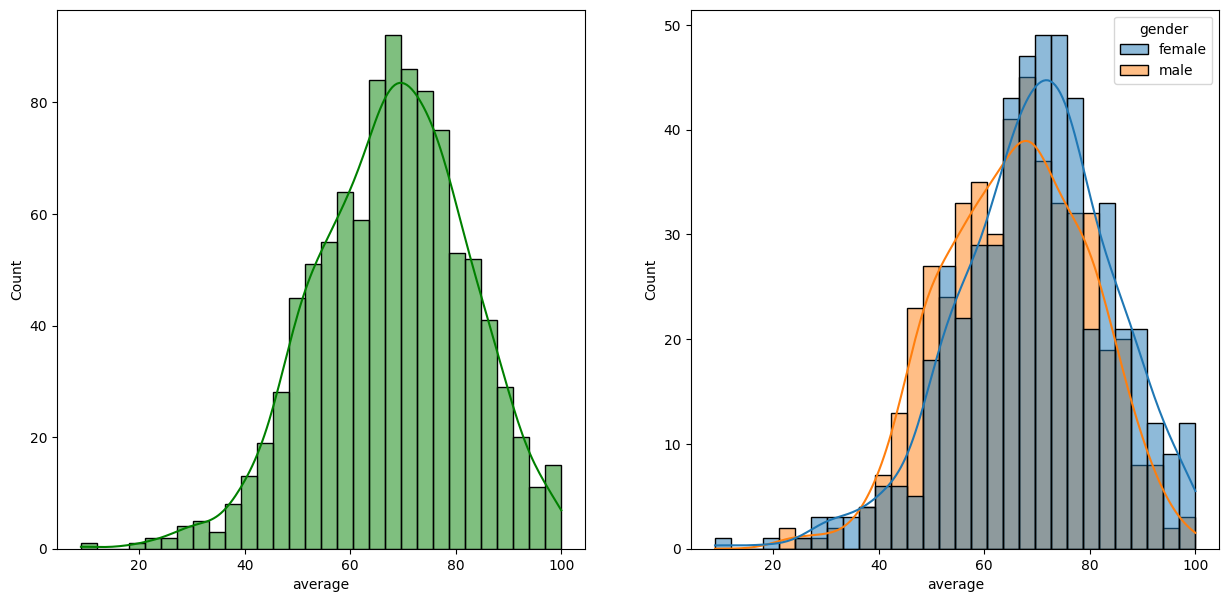

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30,kde=True, hue='gender')


<Axes: xlabel='total score', ylabel='Count'>

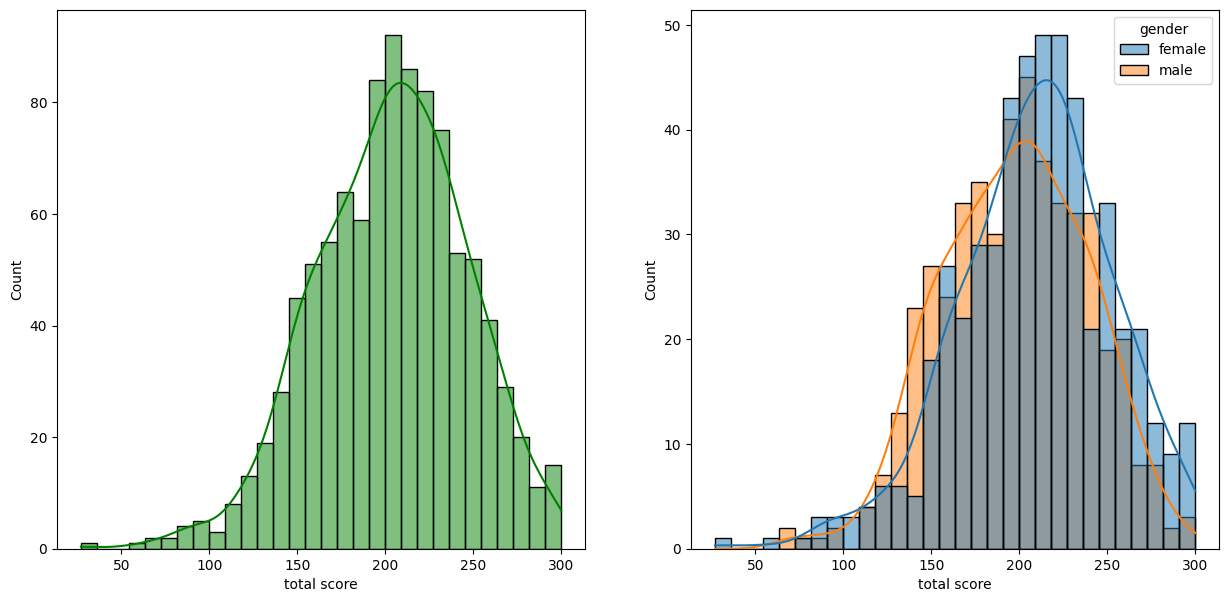

In [17]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', bins=30,kde=True, hue='gender')


#### Insight

- Las estuiantes femenino tienden a tener mejores indicares de rendimientos

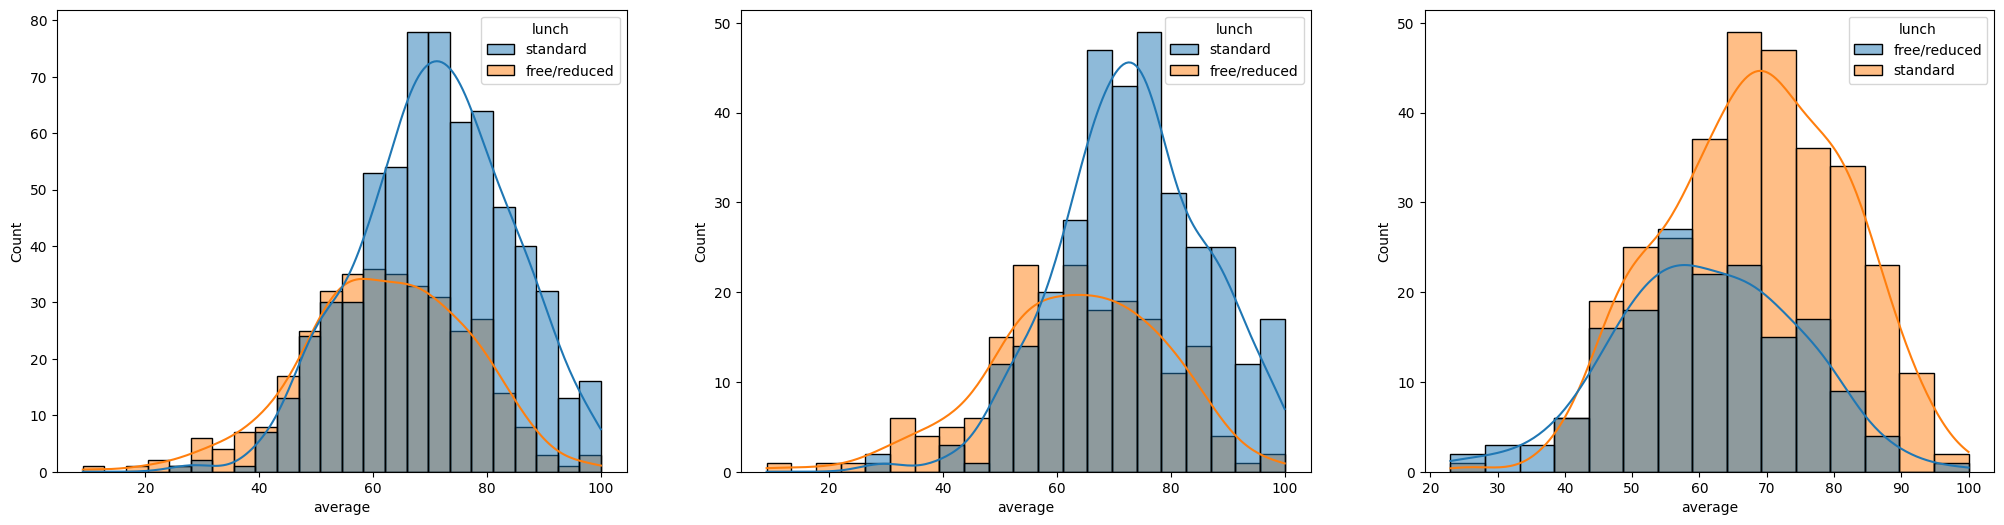

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True, hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True, hue='lunch')
plt.show()

### Insight

- EL almorzar ayuda al rendimiento en las pruebas, tanto para los dos sexo.

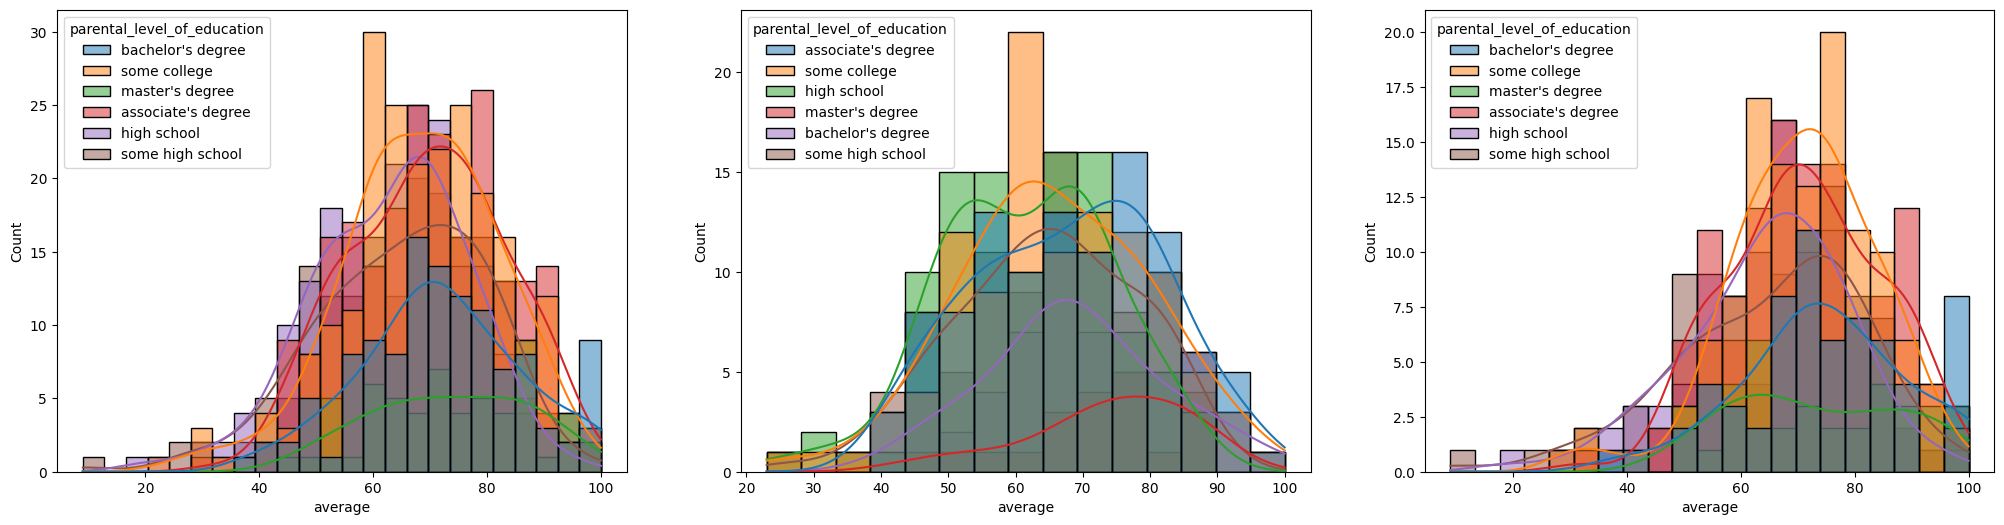

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights

- En general la educación de los padres no ayudan al rendimiento en los exámenes.
- En la segunda gráfica se observa que associate´s degree o master's degree ayuda en las notas de los estudiantes masculinos
- No así con los femenino, que los padres con educación no hace diferencia

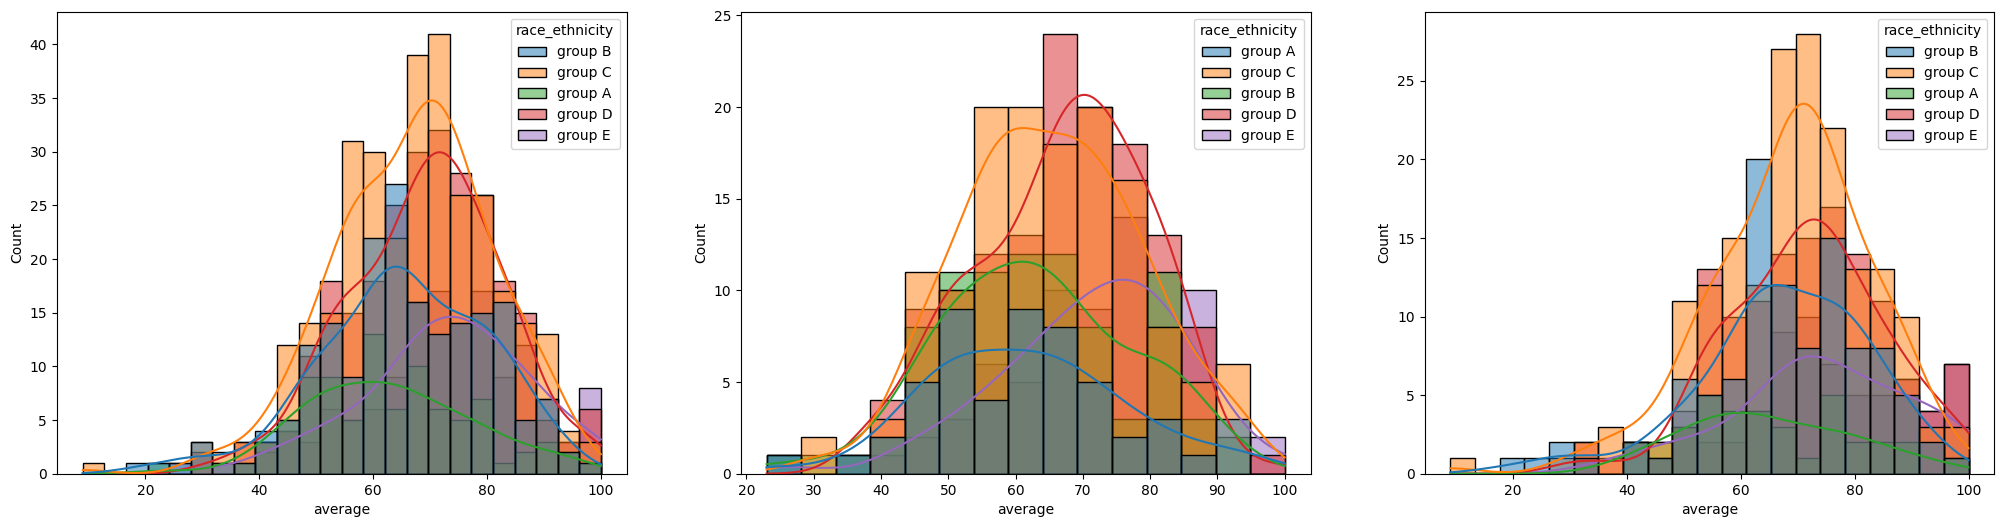

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#### insights

- Se observa que los grupos A y B son los que tienen el peor rendimiento

### 4.2 Puntuación máxima de los estudiantes en las tres materias

<Axes: title={'center': 'Notas de escritura'}, ylabel='writing_score'>

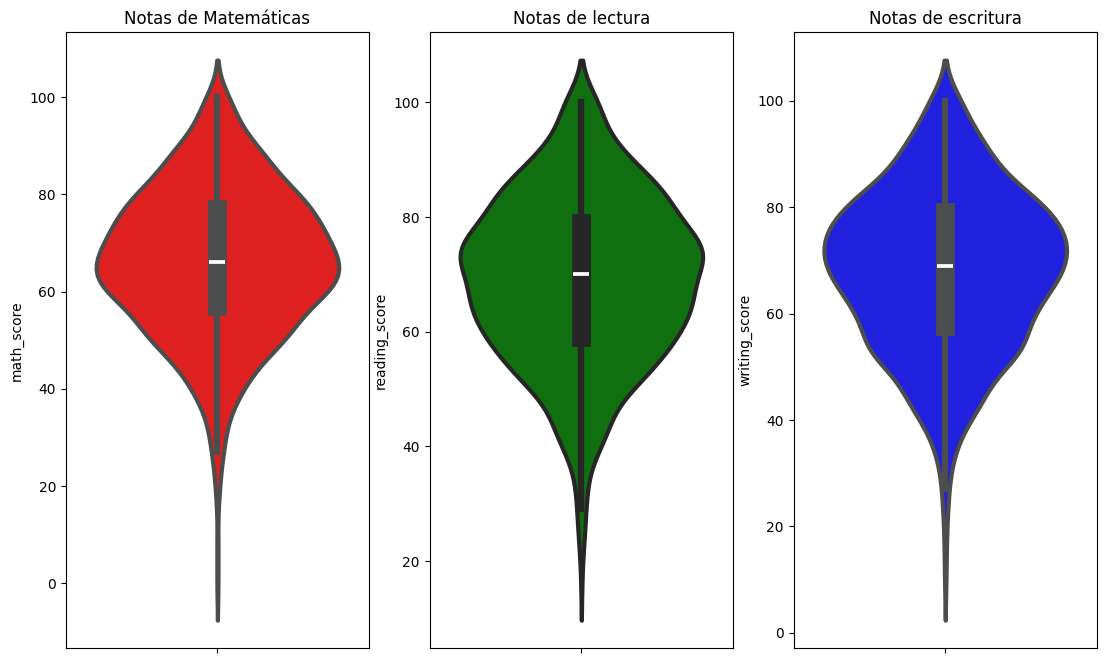

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Notas de Matemáticas')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Notas de lectura')
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Notas de escritura')
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)

### Insights
- Se puede ver que la mayor cantidad de tienen notas entre 60 y 80 en las tres materias

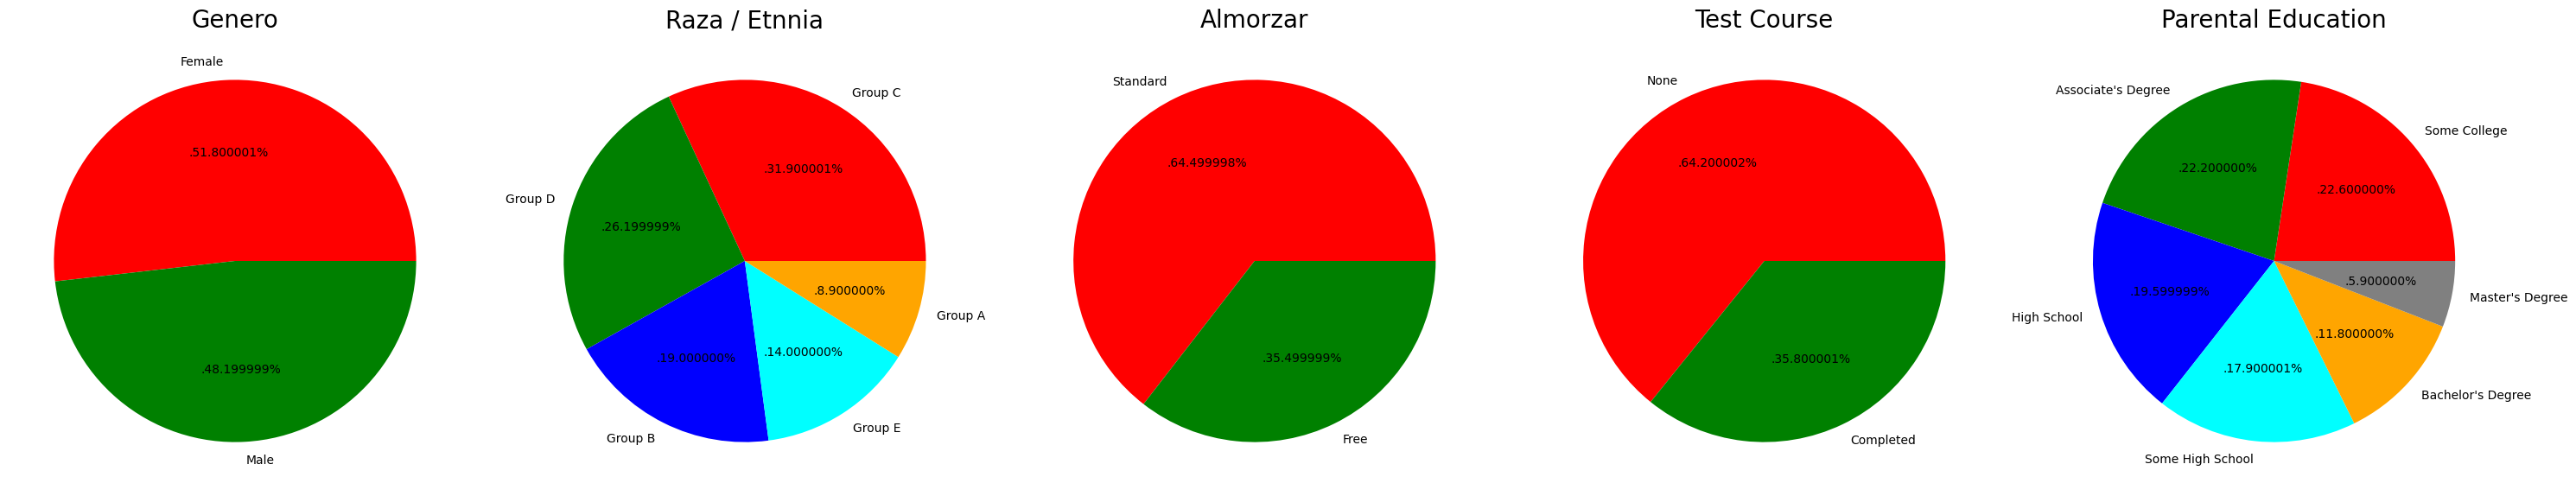

In [22]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Genero', fontsize=20)
plt.axis('off')


plt.subplot(1,5,2)
size =df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color, labels=labels, autopct='.%2f%%')
plt.title('Raza / Etnnia',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels ='Standard','Free'
color = ['red','green']

plt.pie(size, colors=color,labels=labels, autopct='.%2f%%' )
plt.title('Almorzar', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights

- Número de genero masculino y femenino casi iguales
- Grupo de estudiante más grande es el C
- Número de estudiante que tienen un almuerzo estandar es más grande
- Número de estudiante que no completaron el curso es más grande
- Número de estudiante quienes tienen padres con educación el más grande es "Some College" seguido por "Associate's Degree"

#### 4.4 Visualización de atributos
#### 4.4.1 Columna Genero
- ¿Cómo es la distribución de genero?
- El Genero tiene algún impacto en rendimiento de los estudiantes?

#### Análisis univariante (¿Cómo es la distribución de genero?)

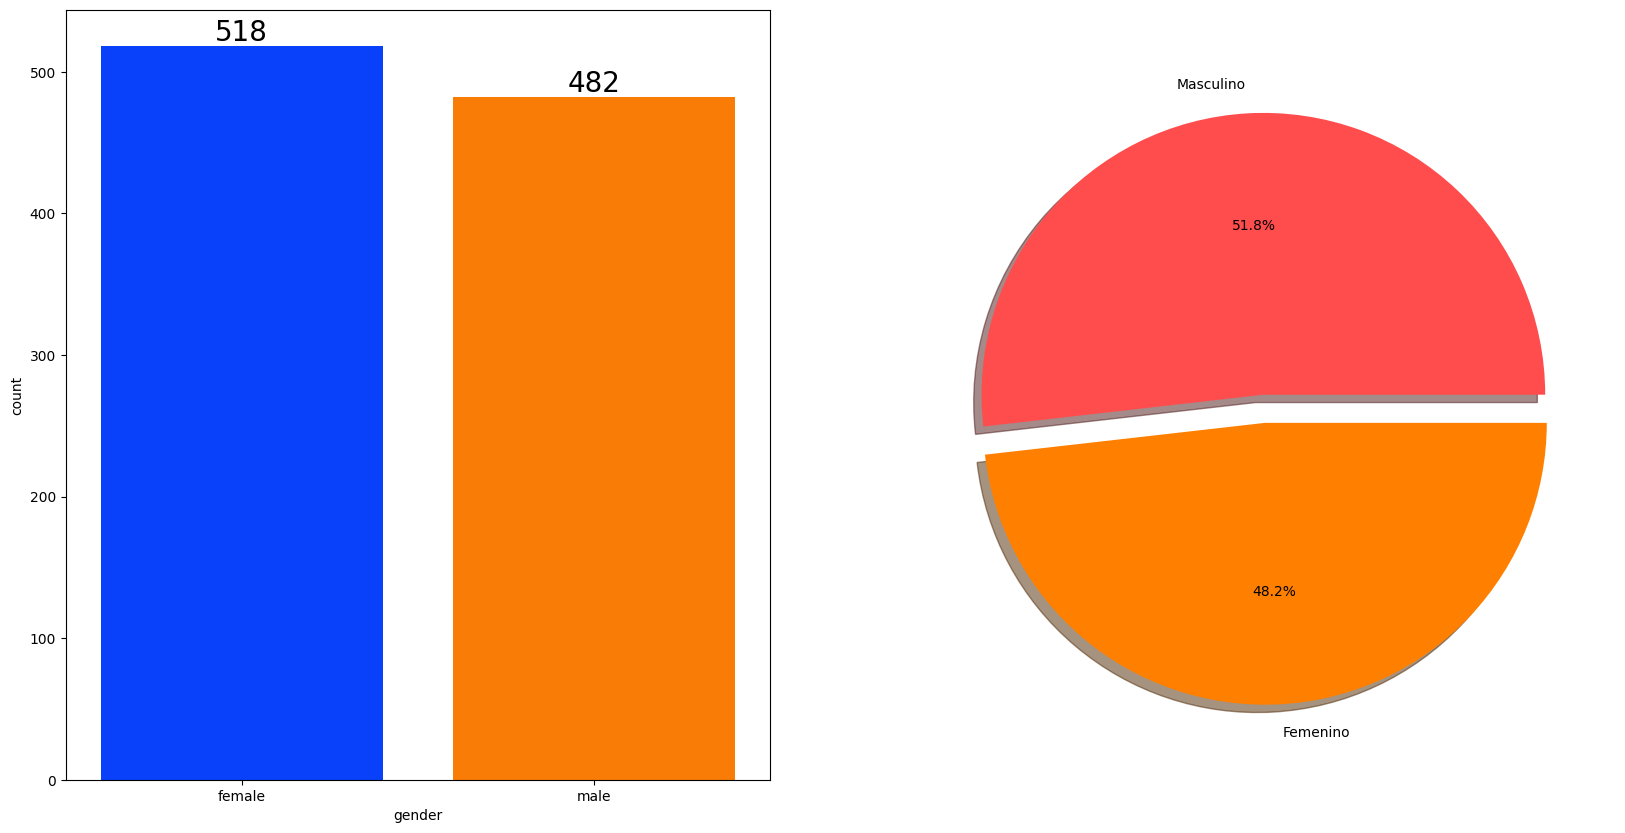

In [23]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Masculino','Femenino'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

####  Los Generos están casi balanceados con 51.8 Masculino y 48.2 Femenino

#### Análisis Bivariante (¿El genero tiene algún impacto con el rendimiento?)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [25]:
numeric_features

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [26]:
numeric_features

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [27]:
gender_group = df.groupby('gender')[numeric_features].mean()
gender_group

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [28]:
plt.figure(figsize=(10,8))

X =['Total Average','Math Average']

female_scores = [gender_group['average'][0],gender_group['math_score'][0]]
male_scores = [gender_group['average'][1],gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.05, male_scores,0.4,label='Male',alpha=0.5)
plt.bar(X_axis - 0.05, female_scores,0.4,label='Female',alpha=0.4)
plt.legend()
plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title("Promedio Total Vs Promedio de matmática separado por genero")

KeyError: 'average'

<Figure size 1000x800 with 0 Axes>

#### Insights

 - El promedio general el genero femenino es mejor que el masculino.
 - En matmática el genero masculino se destaca

### 4.4.2 Columna Raza/Etnia

- ¿Cómo esla distribución del grupo Etnia?
- ¿Cómo impacta la etnia en el rendimiento ?

#### Análisis Univariante (¿Cómo esla distribución del grupo Etnia?)

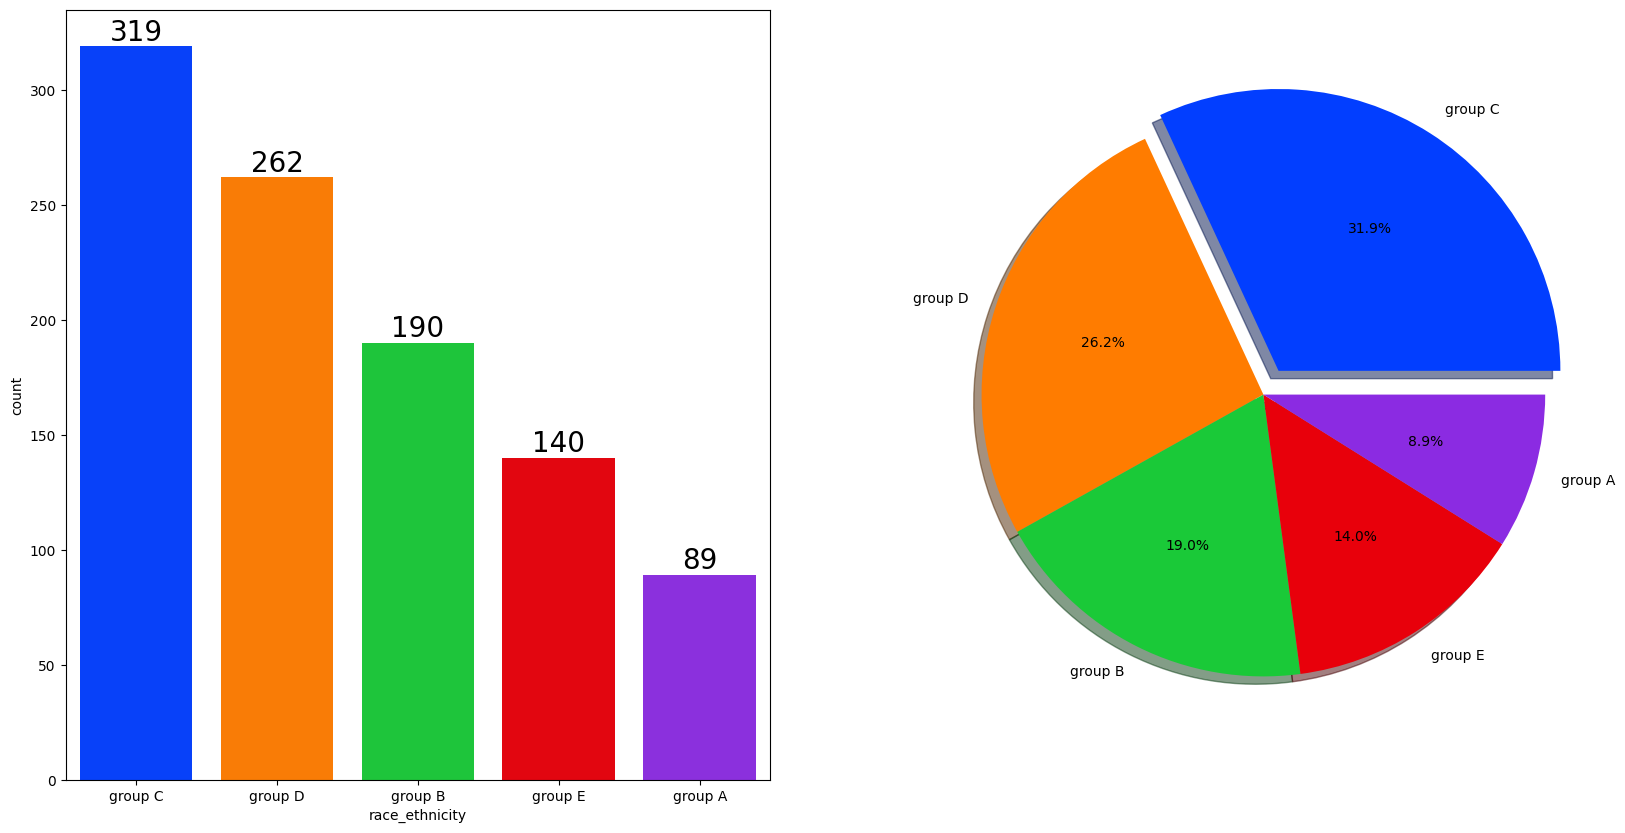

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el orden de las categorías
order_of_categories = df['race_ethnicity'].value_counts().index

# Crear subgráficos
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Gráfico de barras
sns.countplot(data=df, x=df['race_ethnicity'], order=order_of_categories, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Gráfico circular (pastel)
ax[1].pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=sns.color_palette('bright', len(order_of_categories)))

plt.show()


### Insihts
- Los grupos más grande son el "C" y el "D"
- EL grupo mpas bajo es el "A"

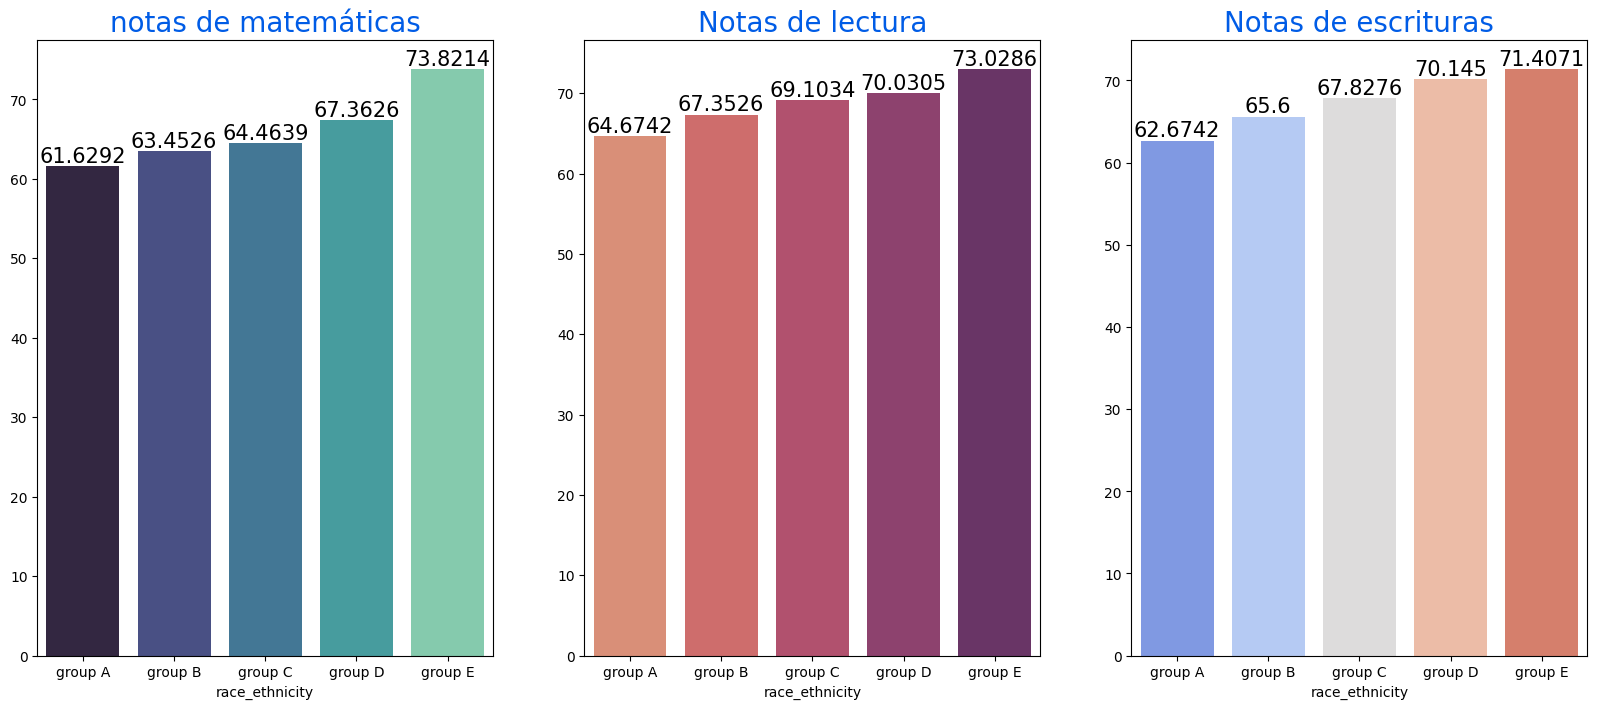

In [ ]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Notas de matemáticas',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Notas de lectura',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Notas de escrituras',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights

- El Grupo E tiene la mayor nota en las tres categórias
- EL Grupo A tiene ma menor nota en las tres categórias
Por lo tanto los estudiante de menor ingreso son los que tienen menor promedio de notas

### 4.4.3Columna Nivel de educación de los padres

- ¿Cuál es la base de educación de los padres de los estudiantes?
- ¿La educación de los padres tienen algún impacto en el rendimiento de los estudiantes?

#### Análisis Univariante (- ¿Cuál es la base de educación de los padres de los estudiantes?)

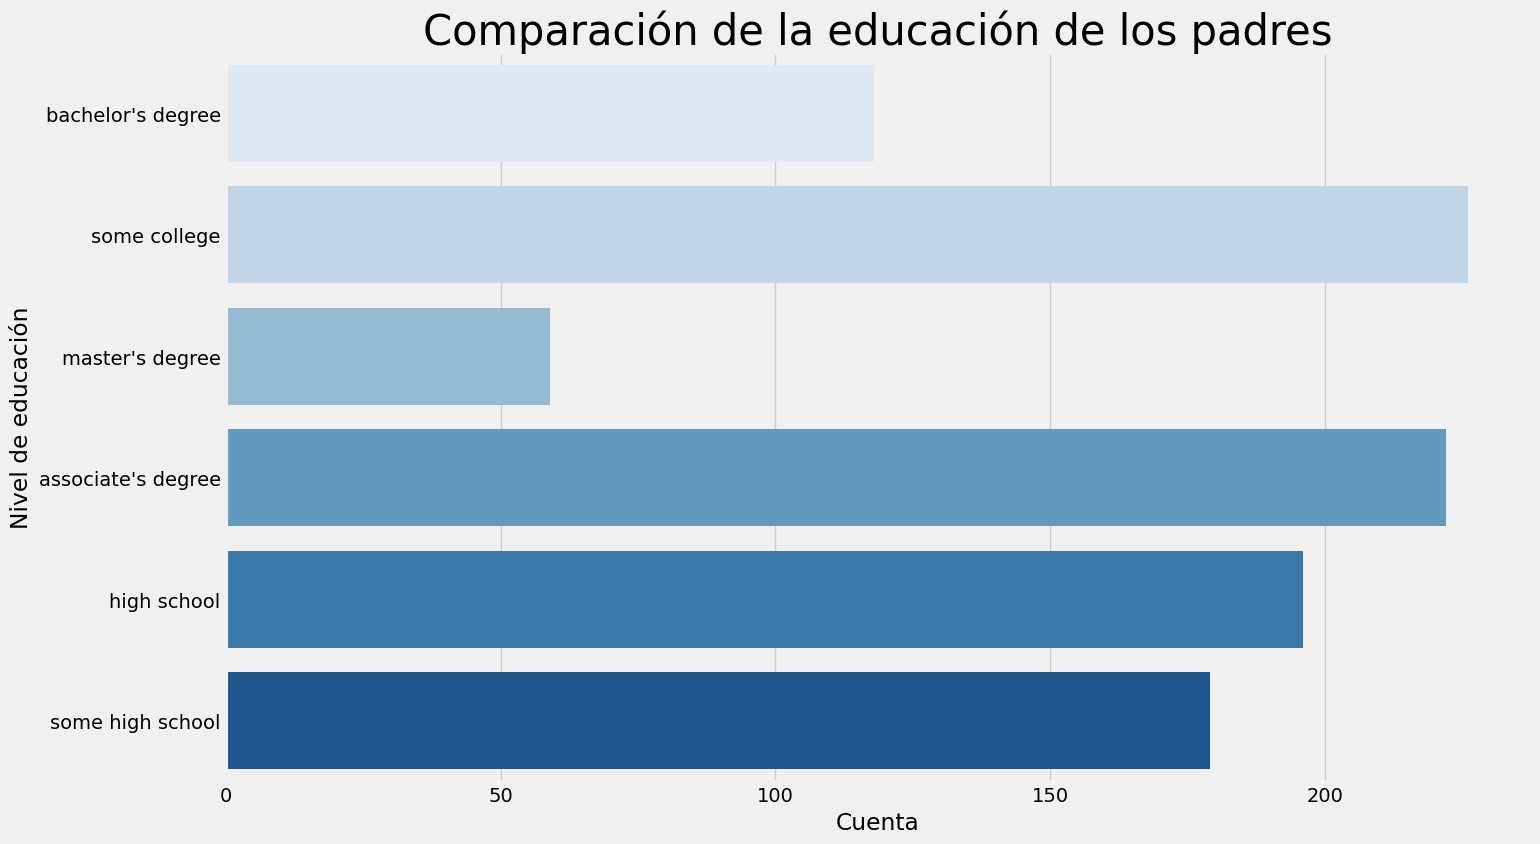

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparación de la educación de los padres', fontweight=30, fontsize=30)
plt.ylabel('Nivel de educación')
plt.xlabel('Cuenta')
plt.show()

#### Ingishts
- La mayor parte de los padres tienen el nivel "Some college"

### Análisis Bivariante (- ¿La educación de los padres tienen algún impacto en el rendimiento de los estudiantes?)

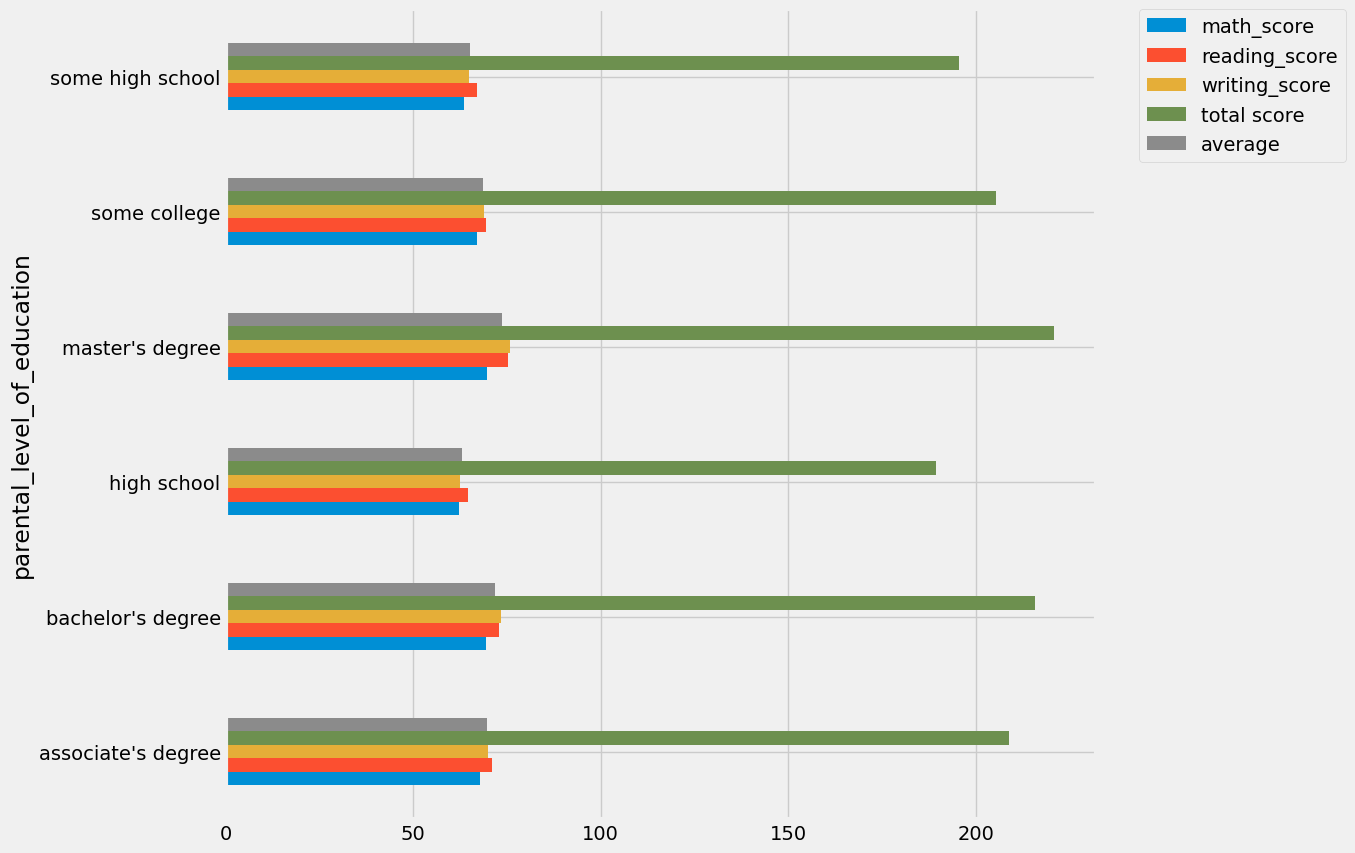

In [ ]:
df.groupby('parental_level_of_education')[numeric_features].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

- Los estudiantes con padres con nivel "master's degree" tienen mejor rendimiento 

### 4.4.4 Columna Almuerzo

- ¿Cuál tipo de almuerzo es las común entre los estudiantes?
- ¿Cuál es el efecto del almuerzo en el rendimiento de los estudiantes?

### Análisis Univariante (¿Cuál tipo de almuerzo es las común entre los estudiantes?)

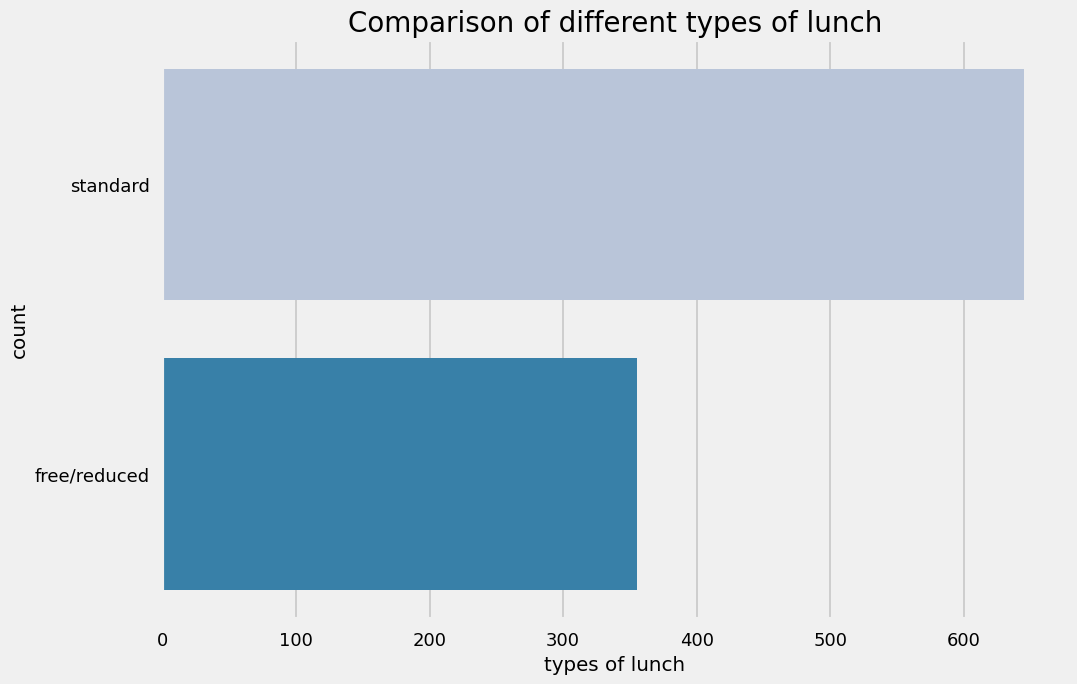

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

- La mayoría tienen un almuerzo estándar

### Análisis Bivariante (- ¿Cuál es el efecto del almuerzo en el rendimiento de los estudiantes?)

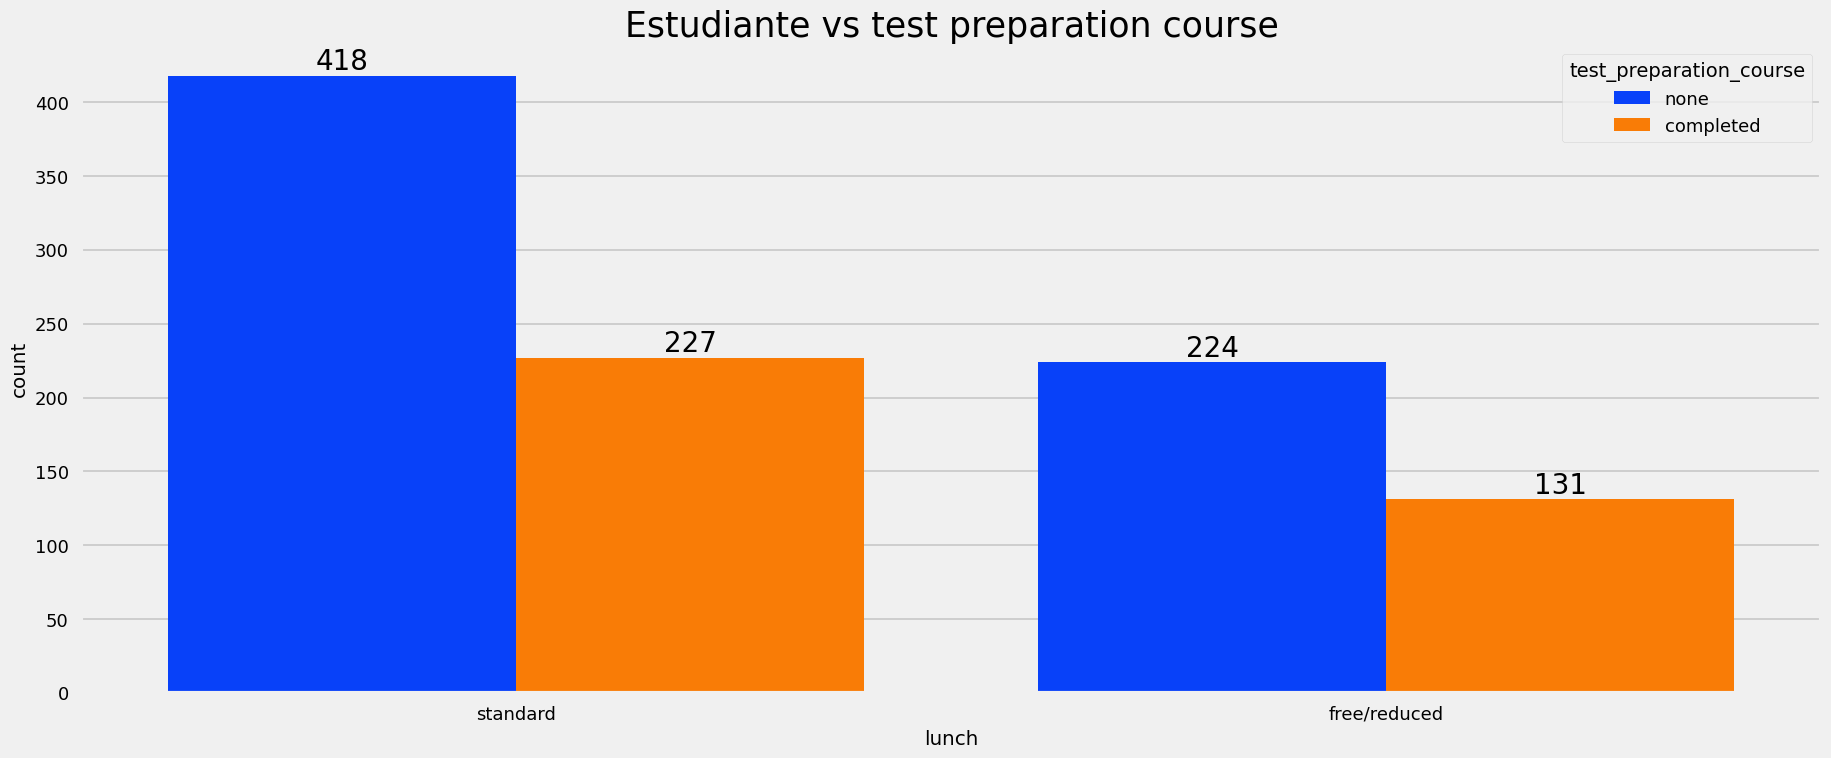

In [ ]:

# Crear subgráficos
fig, ax = plt.subplots(figsize=(20, 8))

# Crear el gráfico de barras
sns.countplot(x=df['lunch'], data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax)

# Configurar título y etiquetas
ax.set_title('Estudiante vs test preparation course', color='black', size=25)
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)

# Mostrar el gráfico
plt.show()

    


In [63]:
test_lunch_standar = (df[df['lunch']=='standard'].groupby('test_preparation_course')['lunch'].count()/df[df['lunch']=='standard'].groupby('test_preparation_course')['lunch'].count().sum())
test_lunch_reduced = (df[df['lunch']=='free/reduced'].groupby('test_preparation_course')['lunch'].count()/df[df['lunch']=='free/reduced'].groupby('test_preparation_course')['lunch'].count().sum())
print(f"El porcentaje de estudiantes que tienen un almuerzo estándar y han completado el test es del {test_lunch_standar['completed']:.2%}")
print(f"El porcentaje de estudiantes que tienen un almuerzo reducido y han completado el test es del {test_lunch_reduced['completed']:.2%}")

El porcentaje de estudiantes que tienen un almuerzo estándar y han completado el test es del 35.19%
El porcentaje de estudiantes que tienen un almuerzo reducido y han completado el test es del 36.90%


- Se puede observar en la figura que tener un almuerzo estándar tiene una mayor cantidad de estudiante que completan el curso.
- EL porcentaje de estudiantes que tienen un almuerzo standar o reducido son casi iguales 

### Columna de Test Preparation course

- ¿Cuantos terminan el curso?
- ¿ Como impacta en el rendimiento los que no terminan el curso'?

#### Análisis Univariante

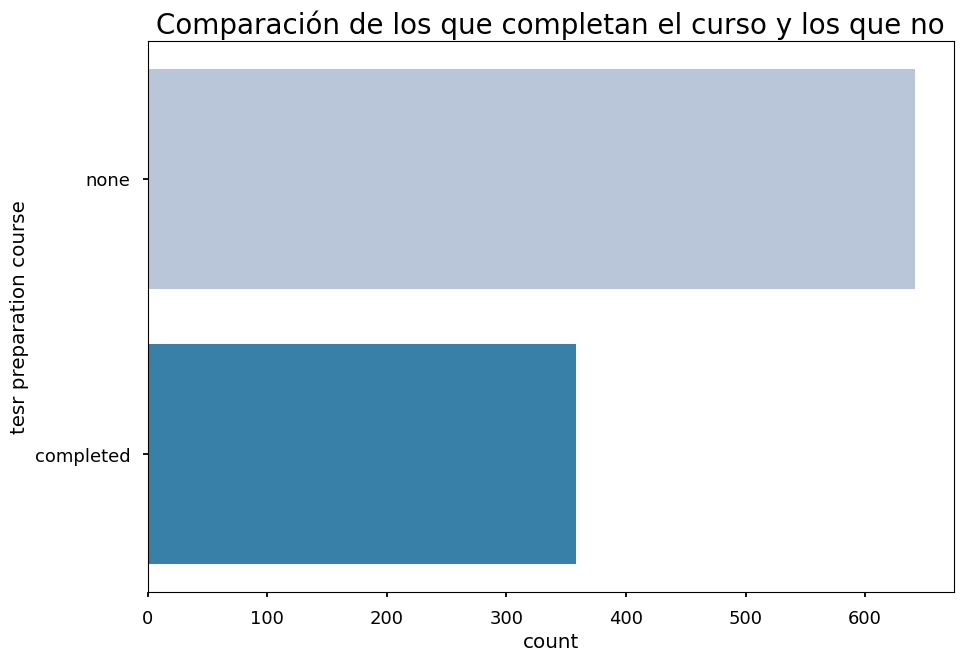

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['test_preparation_course'], palette = 'PuBu')
plt.title('Comparación de los que completan el curso y los que no', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('test preparation course')
plt.show()

- La mayoría de los estudiantes no completan el curso

### 4.4.5 Análisis Bivariado (- ¿ Como impacta en el rendimiento los que no terminan el curso'?)

<Axes: xlabel='lunch', ylabel='writing_score'>

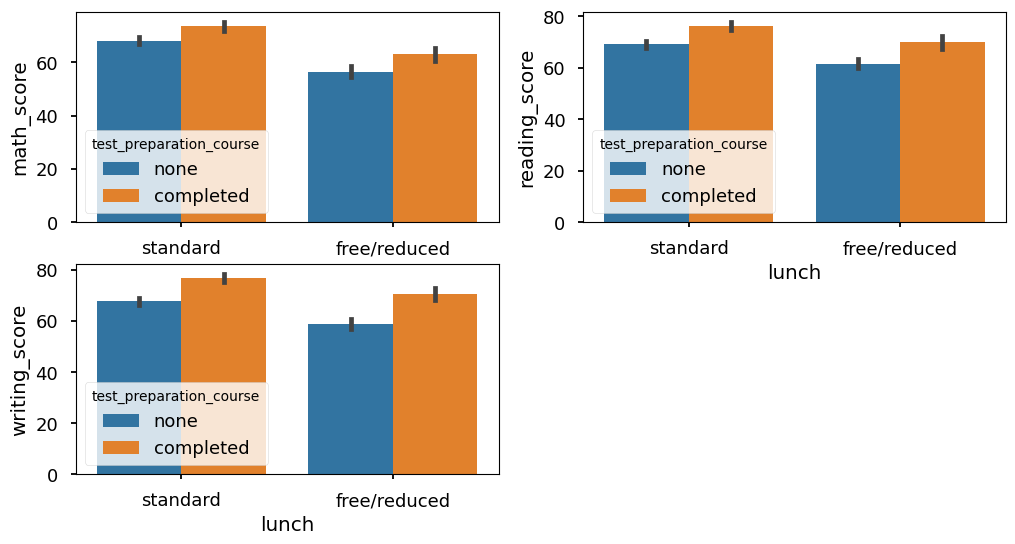

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

- Los estudiantes que tienen un almuerzo estandar tienen mejor rendimiento que los que no

### 4.4.6 Verificación de los valores atípicos

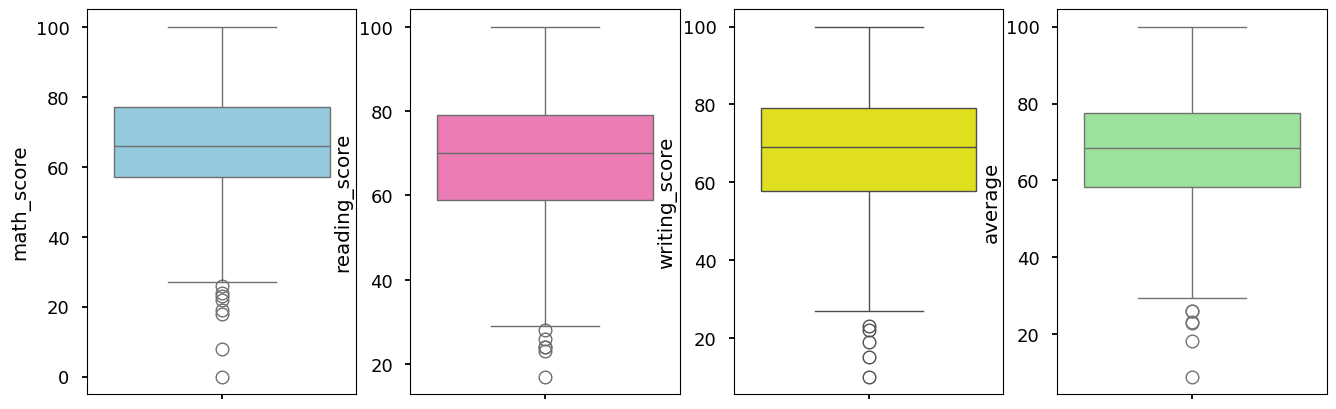

In [68]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### 4.4.7 Análisis Mutivariado usando pairplot

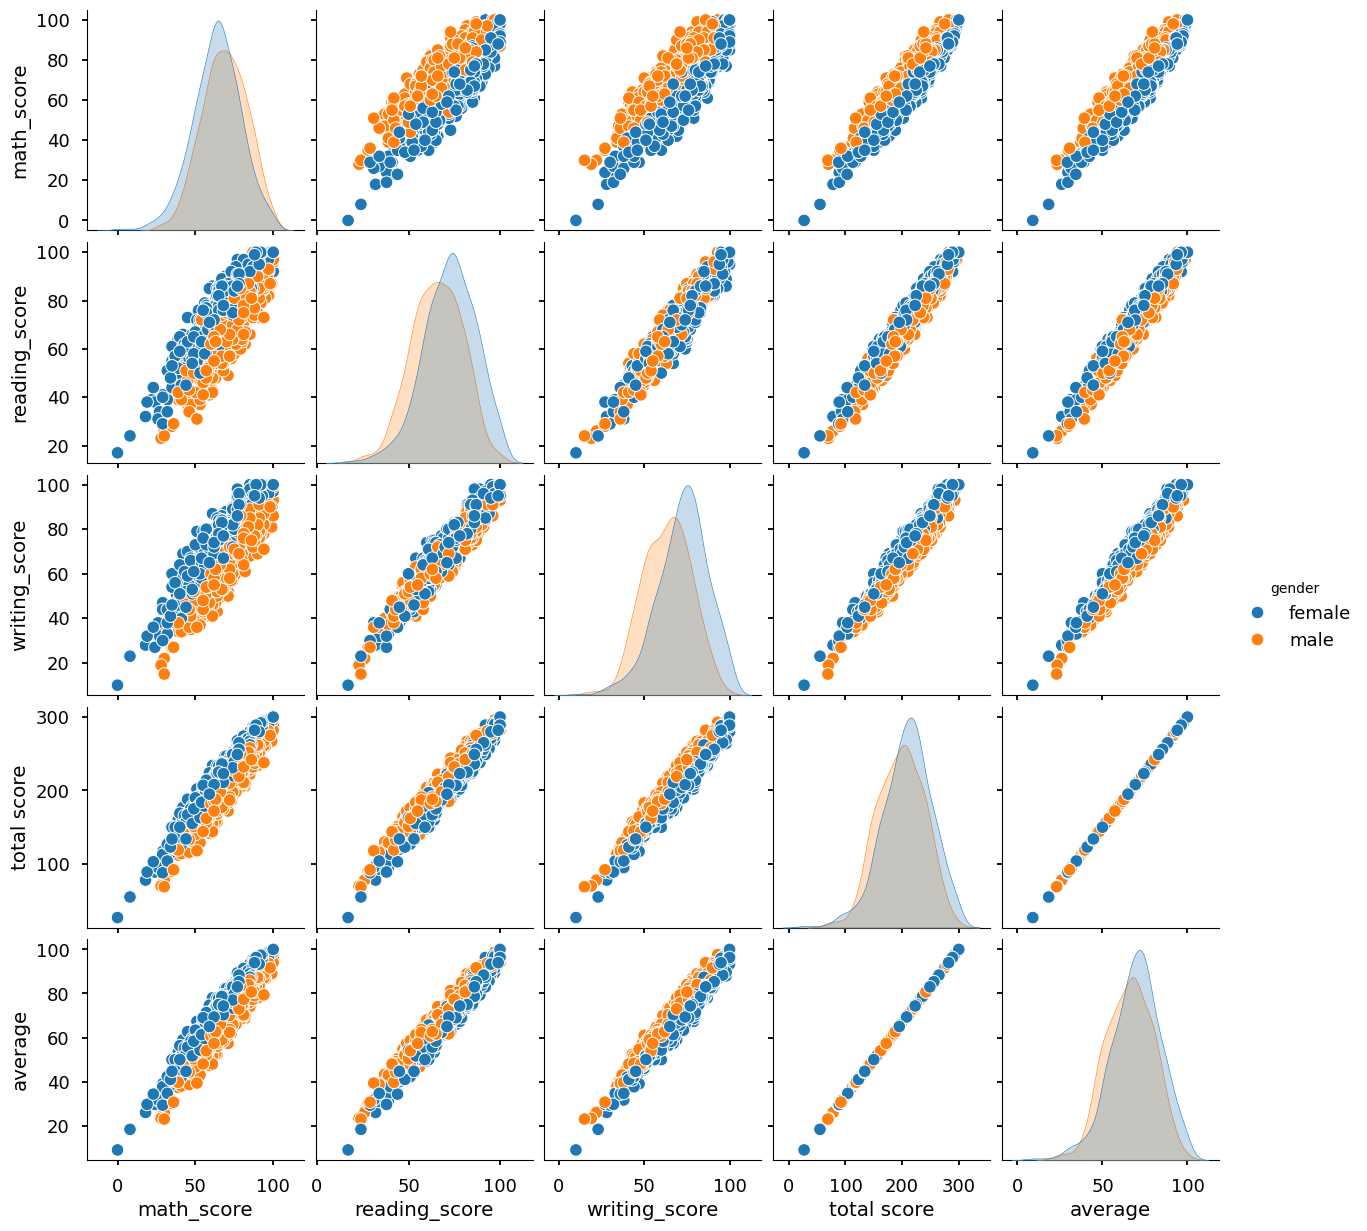

In [69]:
sns.pairplot(df,hue = 'gender')
plt.show()

- Se puede ver que el rendimiento de cada materia aumenta en forma lineal y positiva con respecto a las otras materias

### 5. Conclusiones
- El desempeño del estudiante está relacionado con el almuerzo, la raza y el nivel educativo de los padres.
- Las mujeres lideran en porcentaje de pases y también son las máximas anotadoras.
- El desempeño del estudiante no está muy relacionado con el curso de preparación para exámenes.
- Terminar el curso de preparación es beneficioso.